In [1]:
# Load all libraries

import xarray
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
# Find only the TREFHT files in the control files

files = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/*.TREFHT.*')
print(files)
print(len(files))

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.040001-049912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.050001-059912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.060001-069912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.070001-079912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.080001-089912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.090001-099912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.100001-109912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.110001-119912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.120001-129912.nc', '/data/keeling/a/cristi/a/d

In [3]:
# Process the datasets

control = xarray.open_mfdataset(files,combine="by_coords",use_cftime=True)
control

<xarray.Dataset>
Dimensions:       (time: 21612, lat: 192, lon: 288, ilev: 31, lev: 30,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    TREFHT        (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(1200,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    ...            ...
    ntrn          (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    sol_tsi       (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    w_stag        (time, slat) float64 dask.array<chunksize=(1200, 191), meta=np.ndarray>
    wnummax       (time, lat) int32 dask.array<chunksize=(1200, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [4]:
# Find the TREFHT files in the historical data

files_hist_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.TREFHT.192001-200512.nc')
files_hist = files_hist_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_hist)
print(len(files_hist))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/c

In [5]:
# Process the datasets

historical = xarray.open_mfdataset(files_hist,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
historical

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10,
                          cosp_ht: 40, cosp_sr: 15, cosp_sza: 5,
                          cosp_htmisr: 16, cosp_tau_modis: 6, ensemble_mem: 34,
                          time: 1032, lat: 192, lon: 288, ilev: 31, lev: 30,
                          slat: 191, slon: 288)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) |S8 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.004
    title:                     UNSET
    logname:                   mai
    host:                      ys4731
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/...
    history:                   Wed Sep 11 21:14:41 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [6]:
# Get the vertical motion datasets

files_omega_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.OMEGA.192001-200512.nc')
files_omega = files_omega_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
# Eject 001 - includes 1850-1920
#files_hist.remove('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc')
print(files_omega)
print(len(files_omega))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/d

In [7]:
# Process the datasets

omega = xarray.open_mfdataset(files_omega,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
omega

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10,
                          cosp_ht: 40, cosp_sr: 15, cosp_sza: 5,
                          cosp_htmisr: 16, cosp_tau_modis: 6, ensemble_mem: 34,
                          time: 1032, lev: 30, lat: 192, lon: 288, ilev: 31,
                          slat: 191, slon: 288)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) |S8 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.002
    title:                     UNSET
    logname:                   mai
    host:                      ys1329
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Tue Aug 13 10:43:44 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [15]:
# Find only the PRECC files in the history files

files_PRECC_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/*.PRECC.*')
files_PRECC = files_PRECC_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
print(files_PRECC)
print(len(files_PRECC))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.PRECC.185001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.PRECC.192001-200512.nc', '/data/keeling/a/cristi/a/d

In [16]:
# Process the datasets

PRECC_data = xarray.open_mfdataset(files_PRECC,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
PRECC_data

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, cosp_tau: 7, cosp_scol: 10, cosp_ht: 40,
                          cosp_sr: 15, cosp_sza: 5, cosp_htmisr: 16,
                          cosp_tau_modis: 6, nbnd: 2, ilev: 31, lat: 192,
                          lev: 30, lon: 288, slat: 191, slon: 288, time: 1872,
                          ensemble_mem: 35)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1872), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1872, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) object dask.array<chunksize=(1, 1872), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.001
    title:                     UNSET
    logname:                   mai
    host:                      ys5830
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B1850C5CN.f09_g16.005.cam.i.0402-01-01-0...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Aug 23 21:58:33 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [17]:
# Find only the PRECL files in the history files

files_PRECL_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/*.PRECL.*')
files_PRECL = files_PRECL_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
print(files_PRECL)
print(len(files_PRECL))

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.PRECL.185001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.PRECL.192001-200512.nc', '/data/keeling/a/cristi/a/d

In [18]:
# Process the datasets

PRECL_data = xarray.open_mfdataset(files_PRECL,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
PRECL_data

<xarray.Dataset>
Dimensions:              (cosp_prs: 7, cosp_tau: 7, cosp_scol: 10, cosp_ht: 40,
                          cosp_sr: 15, cosp_sza: 5, cosp_htmisr: 16,
                          cosp_tau_modis: 6, nbnd: 2, ilev: 31, lat: 192,
                          lev: 30, lon: 288, slat: 191, slon: 288, time: 1872,
                          ensemble_mem: 35)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1872), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1872, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) object dask.array<chunksize=(1, 1872), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.001
    title:                     UNSET
    logname:                   mai
    host:                      ys5830
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B1850C5CN.f09_g16.005.cam.i.0402-01-01-0...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Aug 23 21:58:49 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

# Plotting Contours Alone

In [8]:
omega.lev

# Take the data at elevation 524

<xarray.DataArray 'lev' (lev: 30)>
array([  3.643466,   7.59482 ,  14.356632,  24.61222 ,  38.2683  ,  54.59548 ,
        72.012451,  87.82123 , 103.317127, 121.547241, 142.994039, 168.22508 ,
       197.908087, 232.828619, 273.910817, 322.241902, 379.100904, 445.992574,
       524.687175, 609.778695, 691.38943 , 763.404481, 820.858369, 859.534767,
       887.020249, 912.644547, 936.198398, 957.48548 , 976.325407, 992.556095])
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          level
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [9]:
# Getting vertical velocity at around 500 mb

omega_500 = omega['OMEGA'].sel(lev=524.687175, method='nearest')
omega_500

<xarray.DataArray 'OMEGA' (ensemble_mem: 34, time: 1032, lat: 192, lon: 288)>
dask.array<getitem, shape=(34, 1032, 192, 288), dtype=float32, chunksize=(1, 1032, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    mdims:         1
    units:         Pa/s
    long_name:     Vertical velocity (pressure)
    cell_methods:  time: mean

In [10]:
# Only the last 30 years - average over those years 

omega_500_last30 = omega_500.sel(time=slice("1976","2006"))
omega_averaged_time = omega_500_last30.mean('time')
omega_averaged_time

<xarray.DataArray 'OMEGA' (ensemble_mem: 34, lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(34, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: ensemble_mem

In [11]:
# Average over ensemble members

omega_averaged = omega_averaged_time.mean('ensemble_mem')
omega_averaged

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [12]:
# Compute

omega_averaged.load()
print(omega_averaged)

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
array([[-0.00065632, -0.00065632, -0.00065632, ..., -0.00065632,
        -0.00065632, -0.00065632],
       [-0.00354737, -0.00367282, -0.00369522, ..., -0.00267125,
        -0.00302047, -0.00332354],
       [ 0.01222138,  0.01208865,  0.01193358, ...,  0.01253631,
         0.01243667,  0.01233596],
       ...,
       [-0.00047996, -0.00043941, -0.00039858, ..., -0.00059823,
        -0.00055958, -0.00052006],
       [-0.00265366, -0.00277356, -0.00289154, ..., -0.00228347,
        -0.00240916, -0.00253222],
       [-0.00335131, -0.00335131, -0.00335131, ..., -0.00335131,
        -0.00335131, -0.00335131]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


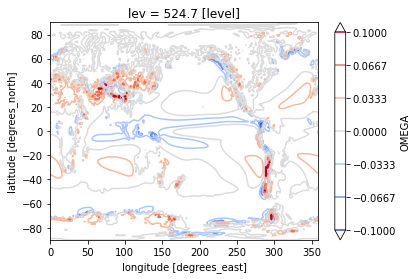

In [21]:
omega_averaged.plot.contour(add_colorbar=True, cmap='coolwarm', vmin=-0.1, vmax=0.1)


Text(0.5, 1.0, 'Vertical Motion at 500 mb')

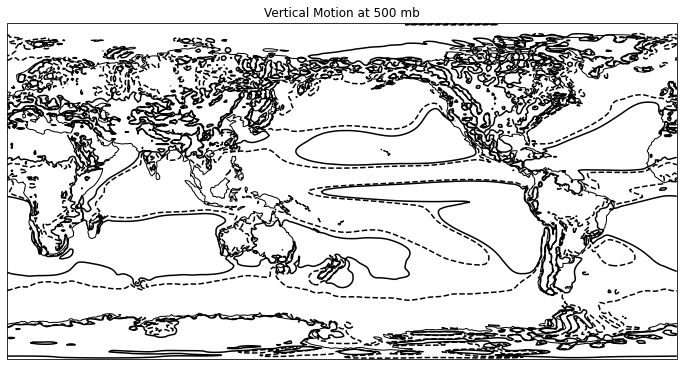

In [55]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
omega_averaged.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Vertical Motion at 500 mb')

# Process Precipitation Data

In [19]:
# Similar to the omega data, I'll take the last 30 years and average over them and the ensemble

PRECC_last30 = PRECC_data.PRECC.sel(time=slice("1976","2006"))
PRECC_avg = PRECC_last30.mean(('time','ensemble_mem'))
PRECC_avg

<xarray.DataArray 'PRECC' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [20]:
PRECC_avg.load()

<xarray.DataArray 'PRECC' (lat: 192, lon: 288)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.69557929e-17, 0.00000000e+00, 0.00000000e+00, ...,
        8.61394788e-17, 5.94291815e-17, 3.73209731e-17],
       ...,
       [4.24170891e-14, 4.31924157e-14, 4.32419095e-14, ...,
        3.12579213e-14, 3.46945271e-14, 3.78511885e-14],
       [3.35817630e-14, 3.33518850e-14, 3.86684398e-14, ...,
        3.39090328e-14, 3.15830024e-14, 3.17661784e-14],
       [1.42593304e-14, 1.44224656e-14, 1.46837634e-14, ...,
        1.38135785e-14, 1.39480534e-14, 1.40183877e-14]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [21]:
# Do the same for PRECL Data

PRECL_last30 = PRECL_data.PRECL.sel(time=slice("1976","2006"))
PRECL_avg = PRECL_last30.mean(('time','ensemble_mem'))
PRECL_avg

<xarray.DataArray 'PRECL' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [22]:
PRECL_avg.load()

<xarray.DataArray 'PRECL' (lat: 192, lon: 288)>
array([[2.0224793e-09, 2.0225777e-09, 2.0225803e-09, ..., 2.0225766e-09,
        2.0224822e-09, 2.0225928e-09],
       [2.0926454e-09, 2.0942068e-09, 2.0960975e-09, ..., 2.0889814e-09,
        2.0899342e-09, 2.0910704e-09],
       [1.6219038e-09, 1.6185614e-09, 1.6144368e-09, ..., 1.6314782e-09,
        1.6279109e-09, 1.6249617e-09],
       ...,
       [7.0240489e-09, 7.0371682e-09, 7.0494632e-09, ..., 6.9849850e-09,
        6.9983312e-09, 7.0119812e-09],
       [6.6191577e-09, 6.6318173e-09, 6.6453074e-09, ..., 6.5818790e-09,
        6.5935697e-09, 6.6066757e-09],
       [5.8822458e-09, 5.8822982e-09, 5.8822476e-09, ..., 5.8821845e-09,
        5.8821930e-09, 5.8822329e-09]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [23]:
# Total precipitation

PRECT = PRECL_avg + PRECC_avg
PRECT.load()

<xarray.DataArray (lat: 192, lon: 288)>
array([[2.0224793e-09, 2.0225777e-09, 2.0225803e-09, ..., 2.0225766e-09,
        2.0224822e-09, 2.0225928e-09],
       [2.0926454e-09, 2.0942068e-09, 2.0960975e-09, ..., 2.0889814e-09,
        2.0899342e-09, 2.0910704e-09],
       [1.6219038e-09, 1.6185614e-09, 1.6144368e-09, ..., 1.6314783e-09,
        1.6279110e-09, 1.6249617e-09],
       ...,
       [7.0240915e-09, 7.0372113e-09, 7.0495063e-09, ..., 6.9850161e-09,
        6.9983659e-09, 7.0120190e-09],
       [6.6191914e-09, 6.6318506e-09, 6.6453461e-09, ..., 6.5819128e-09,
        6.5936012e-09, 6.6067076e-09],
       [5.8822600e-09, 5.8823124e-09, 5.8822622e-09, ..., 5.8821983e-09,
        5.8822067e-09, 5.8822471e-09]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

# Control - Interdecadal Variability (25 years)

In [7]:
decad_means = control['TREFHT'].rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
decad_means

<xarray.DataArray 'TREFHT' (time: 21612, lat: 192, lon: 288)>
dask.array<truediv, shape=(21612, 192, 288), dtype=float32, chunksize=(1350, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [8]:
control_interd_variability = decad_means.std('time')
control_interd_variability

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<_sqrt, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [9]:
# Compute

control_interd_variability.load()
print(control_interd_variability)

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[0.1273539 , 0.11461394, 0.11467533, ..., 0.11461184, 0.12676613,
        0.11465865],
       [0.14538755, 0.14467824, 0.14624155, ..., 0.14092728, 0.15125085,
        0.15261395],
       [0.15446869, 0.129788  , 0.12992617, ..., 0.14409606, 0.14298017,
        0.12877804],
       ...,
       [0.27669904, 0.27733243, 0.27798674, ..., 0.27509886, 0.27563518,
        0.27614513],
       [0.27697283, 0.27717856, 0.277379  , ..., 0.2762998 , 0.27649266,
        0.27671567],
       [0.27849758, 0.27850372, 0.27852124, ..., 0.27848005, 0.27848288,
        0.2784916 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - Control CESM')

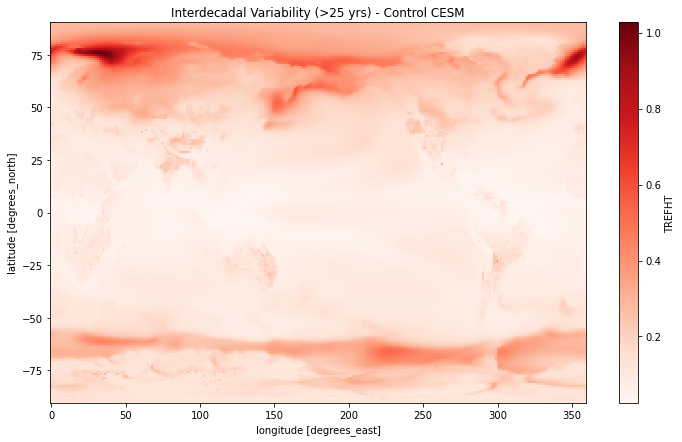

In [59]:
control_interd_variability.plot(cmap='Reds')
plt.title('Interdecadal Variability (>25 yrs) - Control CESM')

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - Control CESM')

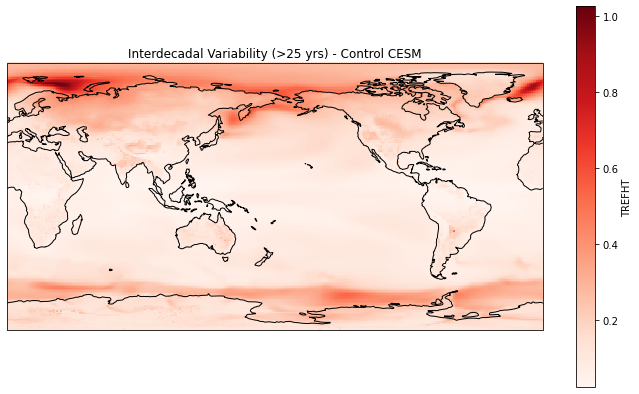

In [60]:
# Plate Carree Projection

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_interd_variability.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds')
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability (>25 yrs) - Control CESM')

# Historical - Interdecadal Variability (25 years)

In [10]:
# Taking interdecadal means
decad_means_hist = historical['TREFHT'].rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
decad_means_hist

<xarray.DataArray 'TREFHT' (ensemble_mem: 34, time: 1032, lat: 192, lon: 288)>
dask.array<truediv, shape=(34, 1032, 192, 288), dtype=float32, chunksize=(1, 1031, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [11]:
hist_interd_variability = decad_means_hist.std('time')
hist_interd_variability

<xarray.DataArray 'TREFHT' (ensemble_mem: 34, lat: 192, lon: 288)>
dask.array<_sqrt, shape=(34, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: ensemble_mem

In [12]:
# I'll be taking the mean across the historical simulations.
historical_ensmeanvar = hist_interd_variability.mean('ensemble_mem')
historical_ensmeanvar

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [13]:
# Compute

historical_ensmeanvar.load()
print(historical_ensmeanvar)

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[0.20389903, 0.20122568, 0.20118184, ..., 0.2011584 , 0.20387709,
        0.20113224],
       [0.21641256, 0.21713102, 0.23591381, ..., 0.23051181, 0.21953373,
        0.22488886],
       [0.22974317, 0.22637609, 0.2222216 , ..., 0.2364321 , 0.23318252,
        0.2344487 ],
       ...,
       [0.39088598, 0.39123544, 0.39160293, ..., 0.38988623, 0.39021766,
        0.39056855],
       [0.38815922, 0.3882796 , 0.38834566, ..., 0.38787523, 0.38803664,
        0.388067  ],
       [0.38494748, 0.38497213, 0.384982  , ..., 0.38487613, 0.3848878 ,
        0.38491902]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


Text(0.5, 1.0, 'Interdecadal Variability for Historical Simulations')

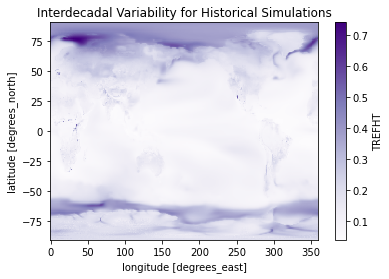

In [24]:
historical_ensmeanvar.plot(cmap='Purples')
plt.title('Interdecadal Variability for Historical Simulations')

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - Historical CESM')

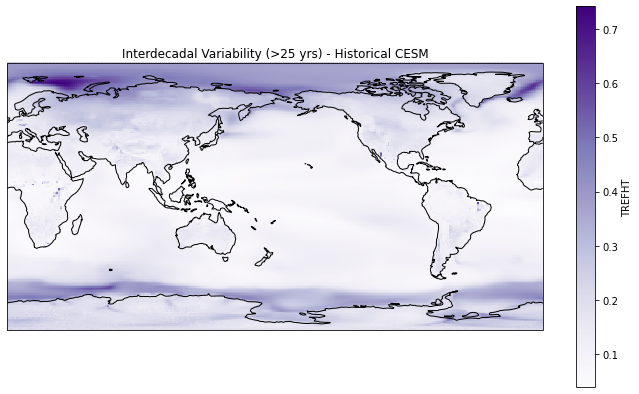

In [22]:
# Plate Carree Projection

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
historical_ensmeanvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples')
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability (>25 yrs) - Historical CESM')

# Historical-Control

In [14]:
# Historical - piControl
delta_var = historical_ensmeanvar - control_interd_variability
delta_var

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[0.07654512, 0.08661174, 0.08650652, ..., 0.08654656, 0.07711096,
        0.08647358],
       [0.07102501, 0.07245278, 0.08967227, ..., 0.08958453, 0.06828287,
        0.07227491],
       [0.07527448, 0.09658809, 0.09229542, ..., 0.09233604, 0.09020235,
        0.10567066],
       ...,
       [0.11418694, 0.11390302, 0.1136162 , ..., 0.11478737, 0.11458248,
        0.11442342],
       [0.11118639, 0.11110103, 0.11096665, ..., 0.11157542, 0.11154398,
        0.11135134],
       [0.1064499 , 0.10646841, 0.10646075, ..., 0.10639608, 0.10640493,
        0.10642743]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Historical-piControl change in interdecadal variability')

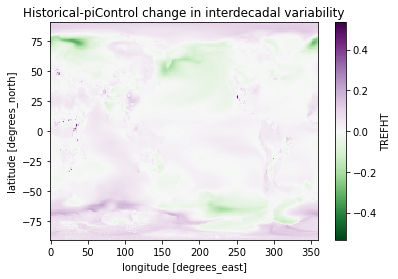

In [29]:
delta_var.plot(cmap='PRGn_r')
plt.title('Historical-piControl change in interdecadal variability')

Text(0.5, 1.0, 'Historical-piControl change in interdecadal variability')

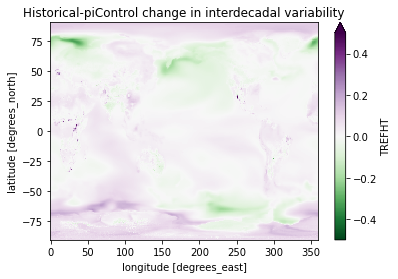

In [30]:
delta_var.plot(cmap='PRGn_r', vmax=0.5, vmin=-0.5)
plt.title('Historical-piControl change in interdecadal variability')

Text(0.5, 1.0, 'Historical-piControl change in interdecadal variability')

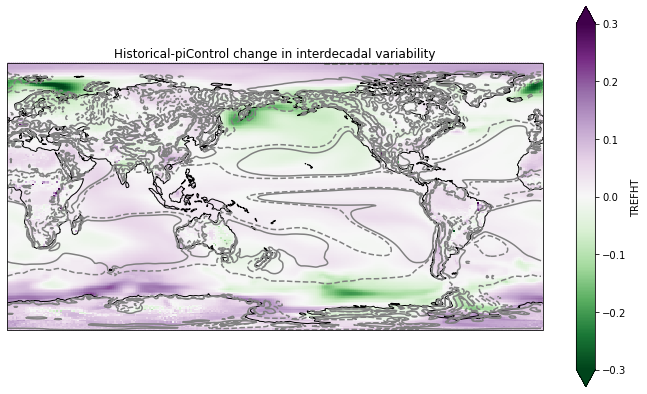

In [33]:
# Plate Carree Projection

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_var.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmax=0.3, vmin=-0.3)
omega_averaged.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Historical-piControl change in interdecadal variability')

Text(0.5, 1.0, 'Historical-piControl change in interdecadal variability')

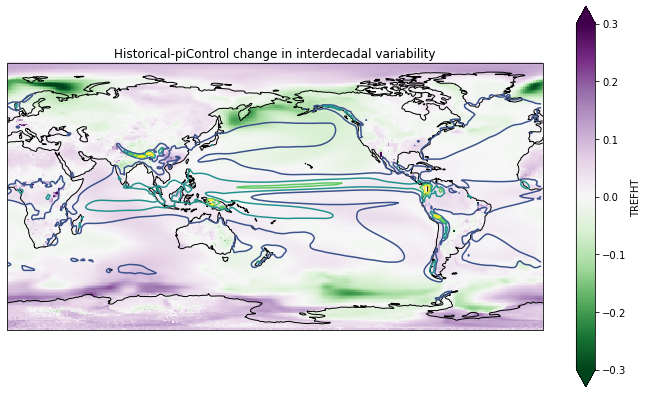

In [25]:
# Precipitation Contours

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
delta_var.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmax=0.3, vmin=-0.3)
PRECT.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,2.0e-7,4e-8))
ax.coastlines(color='black', linewidth=1)
plt.title('Historical-piControl change in interdecadal variability')

# Percentage Change in Interdecadal Variability relative to piControl variability

In [26]:
percent_change = ((delta_var)/control_interd_variability)*100
percent_change

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[60.104256, 75.56824 , 75.436035, ..., 75.512764, 60.82931 ,
        75.41828 ],
       [48.8522  , 50.078564, 61.317913, ..., 63.567913, 45.145447,
        47.357994],
       [48.731224, 74.41989 , 71.03682 , ..., 64.079506, 63.087307,
        82.05643 ],
       ...,
       [41.267563, 41.07093 , 40.871086, ..., 41.72586 , 41.57034 ,
        41.435974],
       [40.14343 , 40.08284 , 40.005424, ..., 40.38201 , 40.342476,
        40.240345],
       [38.22292 , 38.22872 , 38.223564, ..., 38.205997, 38.208786,
        38.21567 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Interdecadal Variability Percentage Change from piControl')

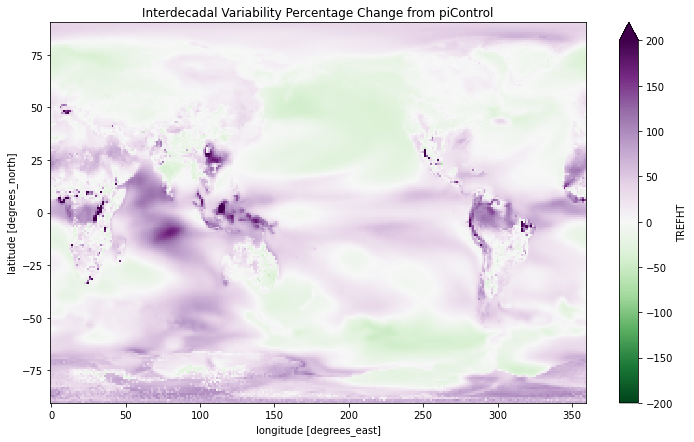

In [26]:
percent_change.plot(cmap='PRGn_r', vmin=-200, vmax=200)
plt.title('Interdecadal Variability Percentage Change from piControl')

Text(0.5, 1.0, 'Interdecadal Variability Percentage Change from piControl')

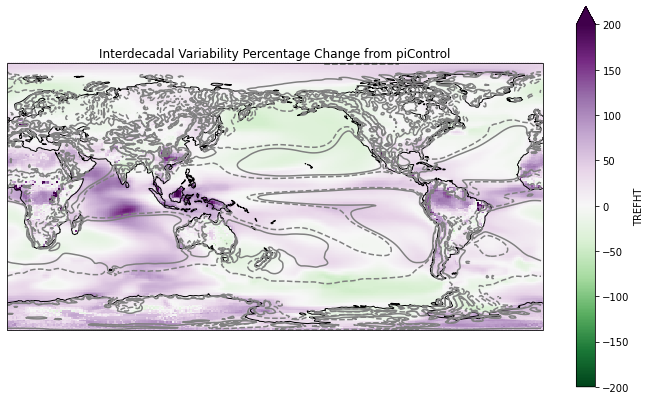

In [32]:
# Plate Carree Projection

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmax=200, vmin=-200)
omega_averaged.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability Percentage Change from piControl')

Text(0.5, 1.0, 'Interdecadal Variability Percentage Change from piControl')

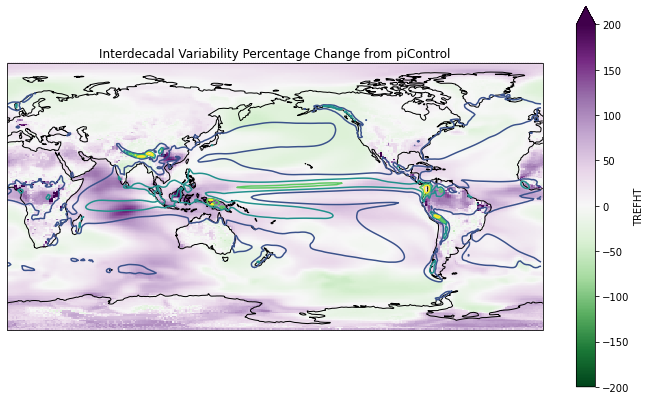

In [34]:
# Plate Carree Projection - Precipitation Contours

plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmax=200, vmin=-200)
PRECT.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,2.0e-7,4e-8))
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability Percentage Change from piControl')

# Historical - Try one simulation

In [11]:
one_datset_decad = one_datset['TREFHT'].rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
one_datset_decad

<xarray.DataArray 'TREFHT' (time: 1032, lat: 192, lon: 288)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [12]:
one_datset_var = one_datset_decad.std('time')

Text(0.5, 1.0, 'One Ensemble Member - Historical')

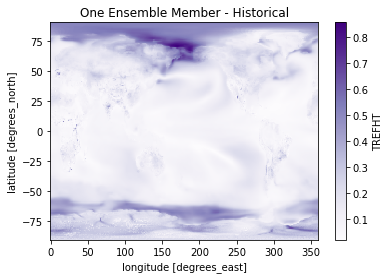

In [13]:
one_datset_var.plot(cmap='Purples')
plt.title('One Ensemble Member - Historical')

# Try Historical-Control with one Ensemble Member

In [18]:
onedat_delta_var = one_datset_var - control_interd_variability
onedat_delta_var

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<subtract, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Trying Hist-piControl with just one ensemble member')

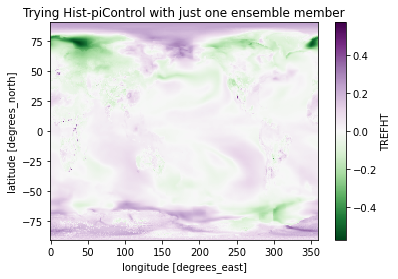

In [19]:
onedat_delta_var.plot(cmap='PRGn_r')
plt.title('Trying Hist-piControl with just one ensemble member')

# Control - Interdecadal Variability over 10 year intervals with groupby

In [9]:
# Getting climatology by grouping by decade and finding the mean over time
# https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade

control_climat = control['TREFHT'].groupby((control['time'].dt.year//10)*10).mean('time')
control_climat

<xarray.DataArray 'TREFHT' (year: 181, lat: 192, lon: 288)>
dask.array<stack, shape=(181, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 400 410 420 430 440 450 ... 2160 2170 2180 2190 2200
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [11]:
# Interdecadal variability by taking standard deviation

control_var = control_climat.std('year')
control_var

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<_sqrt, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Interdecadal Variability')

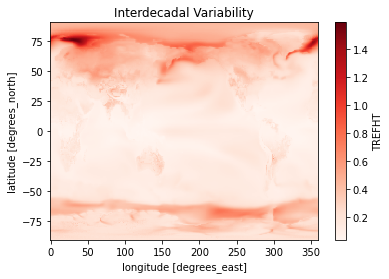

In [12]:
# Plot

control_var.plot(cmap='Reds')
plt.title('Interdecadal Variability')


Text(0.5, 1.0, 'Interdecadal Variability (0-1)')

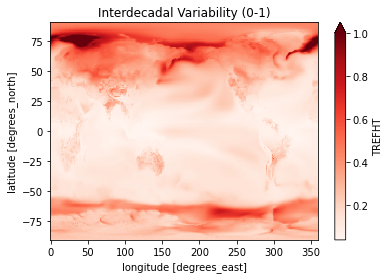

In [13]:
# keep to range of 0-1

control_var.plot(cmap='Reds', vmax=1)
plt.title('Interdecadal Variability (0-1)')

# Control - Intradecadal Variability

In [6]:
# Calculating decadal anomaly

control_anom = control['TREFHT'].groupby((control['time'].dt.year//10)*10) - control_T
control_anom

<xarray.DataArray 'TREFHT' (time: 21612, lat: 192, lon: 288)>
dask.array<sub, shape=(21612, 192, 288), dtype=float32, chunksize=(120, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
    year     (time) int64 400 400 400 400 400 400 ... 2200 2200 2200 2200 2200

In [7]:
# Calculating decadal variability

control_decadal_var = control_anom.std('time')
control_decadal_var

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<_sqrt, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Pre-Industrial Interdecadal Variability (??)')

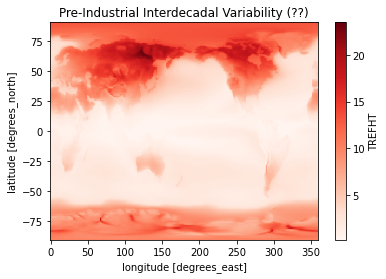

In [27]:
control_decadal_var.plot(cmap='Reds')
plt.title('Pre-Industrial Interdecadal Variability (??)')

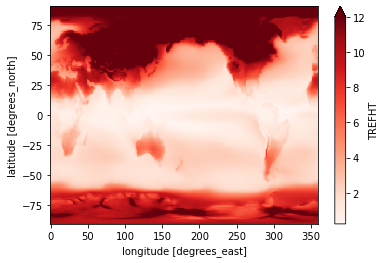

In [11]:
# Constrain to 0-12
control_decadal_var.plot(cmap='Reds', vmax=12)

# Control - Old method - Grouping by decade as separate coordinate (Inefficient)

In [7]:
# Grouping by decade - very inefficient

year = control["time"].dt.year
decade = ((year - year[0]) / 10).astype(int)
decade

<xarray.DataArray 'year' (time: 21612)>
array([  0,   0,   0, ..., 180, 180, 180])
Coordinates:
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00

In [21]:
# Putting the decade variable in

control["decade"] = decade
control_T = control[["decade", "TREFHT"]]
control_T

<xarray.Dataset>
Dimensions:  (time: 21612, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Data variables:
    decade   (time) int64 0 0 0 0 0 0 0 0 0 ... 180 180 180 180 180 180 180 180
    TREFHT   (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [22]:
# Climatological mean

control_mean = control_T.groupby("decade").mean("time")
control_mean

<xarray.Dataset>
Dimensions:  (decade: 181, lat: 192, lon: 288)
Coordinates:
  * decade   (decade) int64 0 1 2 3 4 5 6 7 ... 173 174 175 176 177 178 179 180
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    TREFHT   (decade, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [29]:
# Anomalies over decades

control_anom = control_T['TREFHT'] - control_mean['TREFHT']
control_anom = control_anom.drop('decade')
control_anom = control_anom.sel(decade=1, drop=True)
control_anom

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/dask/array/core.py:4806: PerformanceWarning: Increasing number of chunks by factor of 18
  result = blockwise(


<xarray.DataArray 'TREFHT' (time: 21612, lat: 192, lon: 288)>
dask.array<getitem, shape=(21612, 192, 288), dtype=float32, chunksize=(1212, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00

In [ ]:
# Variability

control_variability = control_anom.std('')